# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [267]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
mouse_study= pd.merge(mouse_metadata, study_results, how="left", on='Mouse ID')

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [191]:
# Checking the number of mice.
mouse_number=len(mouse_study['Mouse ID'].unique())
mouse_number

249

In [192]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df=mouse_study.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_id=mouse_study.loc[duplicate_df,"Mouse ID"]
number_of_duplicate=duplicate_id.unique()

number_of_duplicate

array(['g989'], dtype=object)

In [193]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_table=mouse_study[mouse_study.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [194]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [195]:
# Checking the number of mice in the clean DataFrame.
clean_unique=len(clean_mouse_study["Mouse ID"].unique())
clean_unique

249

## Summary Statistics

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = clean_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = clean_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = clean_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({"Total Mean": tumor_mean, "Total Median":tumor_median, "Total Variance":tumor_variance, 
                               "Total Standard Deviation":tumor_stdev, "Total SEM": tumor_sem})
summary

,Total Mean,Total Median,Total Variance,Total Standard Deviation,Total SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [197]:
tumor_mean = clean_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = clean_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = clean_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = clean_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate=clean_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean",
                                                                                       "median",
                                                                                       "var",
                                                                                       "std",
                                                                                       "sem"]})
renamed_summary_aggregate = summary_aggregate.rename(columns={"mean":"Total Mean", 
                                                              "median": "Total Median", 
                                                              "var": "Variance", 
                                                              "std": "Standard Deviation", 
                                                              "sem": "SEM"})

renamed_summary_aggregate

Tumor Volume (mm3)                                             \
                     Total Mean Total Median   Variance Standard Deviation   
Drug Regimen                                                                 
Capomulin             40.675741    41.557809  24.947764           4.994774   
Ceftamin              52.591172    51.776157  39.290177           6.268188   
Infubinol             52.884795    51.820584  43.128684           6.567243   
Ketapril              55.235638    53.698743  68.553577           8.279709   
Naftisol              54.331565    52.509285  66.173479           8.134708   
Placebo               54.033581    52.288934  61.168083           7.821003   
Propriva              52.393463    50.909965  43.138803           6.568014   
Ramicane              40.216745    40.673236  23.486704           4.846308   
Stelasyn              54.233149    52.431737  59.450562           7.710419   
Zoniferol             53.236507    51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

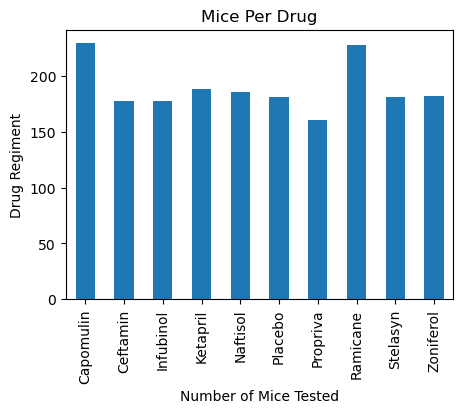

<Figure size 640x480 with 0 Axes>

In [198]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_drug = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_bar_plot=mice_per_drug.plot(kind="bar",figsize=(5,3.5))
plt.title("Mice Per Drug")
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regiment")
plt.show()

plt.tight_layout()
plt.savefig("Images/pandas_plot_mice_per_drug.png")


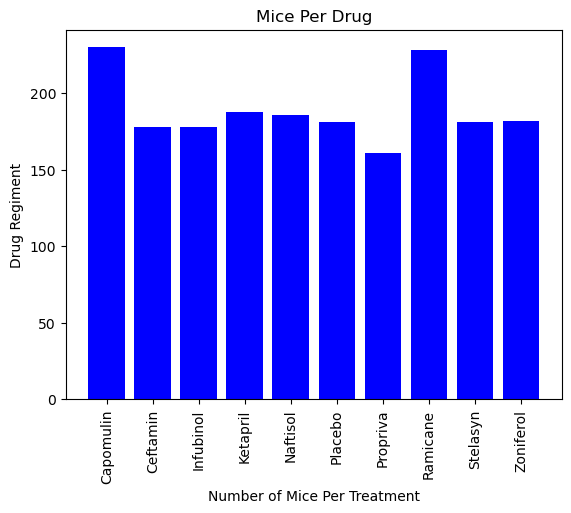

<Figure size 640x480 with 0 Axes>

In [199]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(mice_per_drug))
y_axis=(mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count())

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_per_drug.index.values,rotation="vertical")

plt.bar(x_axis, y_axis, color='b', alpha=1, align="center") 
plt.title("Mice Per Drug")
plt.xlabel("Number of Mice Per Treatment")
plt.ylabel("Drug Regiment")
plt.show()

plt.tight_layout()
plt.savefig("Images/pyplot_mice_per_treatment.png")



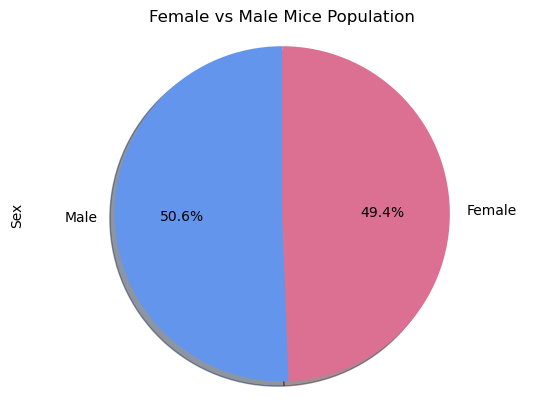

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#number of mice based on gender
duplicate_gender=mouse_study.duplicated(subset=["Mouse ID","Sex"])
gender_all=mouse_study.loc[duplicate_gender,["Sex","Mouse ID"]]
gender_each= gender_all.drop_duplicates(subset=["Mouse ID", "Sex"])
gender_count=gender_each["Sex"].value_counts()


# Labels for the sections of our pie chart

colors = ["cornflowerblue","palevioletred"]
labels = ["Male", "Female"]
explode = (0, 0) 
pandas_pie_chart=data.plot.pie(autopct="%1.1f%%",colors=colors, explode=explode,
                               startangle=90, shadow=True,
                               title='Female vs Male Mice Population')

plt.axis("equal")

#save
plt.savefig("Images/PandasPies.png")
plt.show()



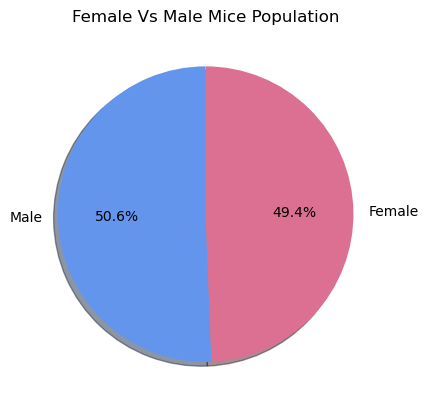

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
duplicate_gender=mouse_study.duplicated(subset=["Mouse ID","Sex"])
gender_all=mouse_study.loc[duplicate_gender,["Sex","Mouse ID"]]
gender_each= gender_all.drop_duplicates(subset=["Mouse ID", "Sex"])
gender_count=gender_each["Sex"].value_counts()

#Create labels
colors = ["cornflowerblue","palevioletred"]
labels = ["Male", "Female"]
explode = (0, 0) 

plt.title("Female Vs Male Mice Population")

#Create pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

#Save
plt.savefig("Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [202]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=mouse_study.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge=greatest_timepoint.merge(mouse_study,on=["Mouse ID","Timepoint"],how="left")
merge              


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [257]:
# Put treatments into a list for for loop (and later for plot labels)
#unique_regimen=merge["Drug Regimen"].unique()
#unique_regimen

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regiment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols=mouse_study.loc[mouse_study["Drug Regimen"]==regiment,"Tumor Volume (mm3)"]
    
    # add subset 
    total_vol_data.append(tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    upper_outlier=tumor_vols>upper_bound
    lower_outlier=tumor_vols<lower_bound
    outliers=tumor_vols.loc[(upper_outlier)|(lower_outlier)]
    print(f"Potential Outliers for{treatments}:{outliers}")



Potential Outliers for['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers for['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers for['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:Series([], Name: Tumor Volume (mm3), dtype: float64)


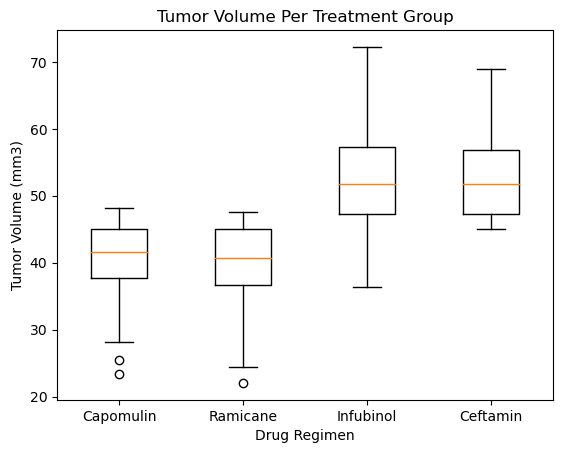

<Figure size 640x480 with 0 Axes>

In [284]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Per Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(total_vol_data,labels=treatments,vert=True)
plt.show()

plt.savefig("Images/boxplot.png")
plt.show()

## Line and Scatter Plots

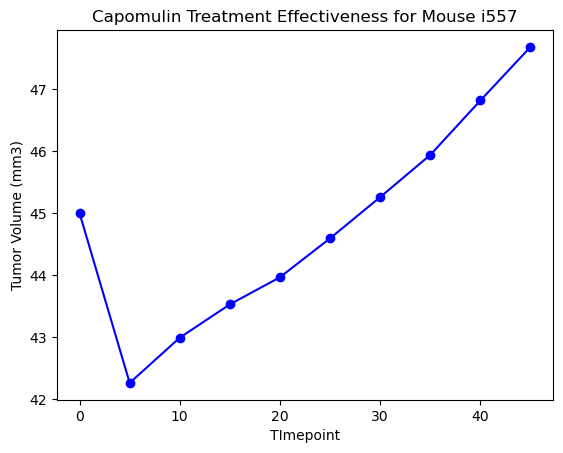

<Figure size 640x480 with 0 Axes>

In [209]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin=mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin",:]


capomulin_mouse=capomulin.loc[capomulin["Mouse ID"]=="i557",:]

x_axis=capomulin_mouse["Timepoint"]
y_axis=capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis,marker="o",color="blue", label="mm")

plt.title("Capomulin Treatment Effectiveness for Mouse i557")
plt.xlabel("TImepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.tight_layout()
plt.savefig("Images/capomulin_i557.png")




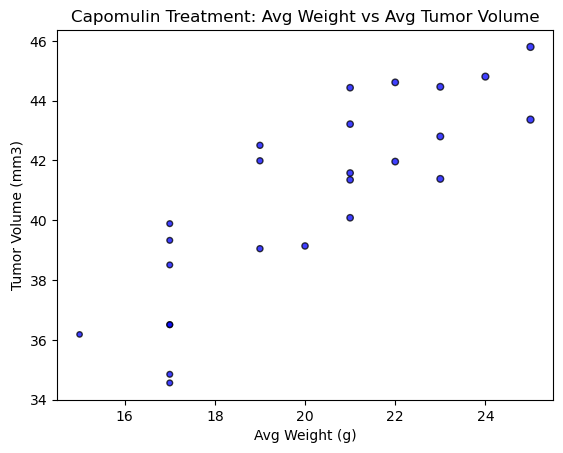

In [210]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin_weight=capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
average_capomulin_volume=capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
x_axis=average_capomulin_weight
y_axis=average_capomulin_volume

#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

#labels
plt.title("Capomulin Treatment: Avg Weight vs Avg Tumor Volume")
plt.xlabel("Avg Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#save
plt.savefig("Images/capomulin_avgweight_avgvol.png")


## Correlation and Regression

The correlation between both factors is: 0.84


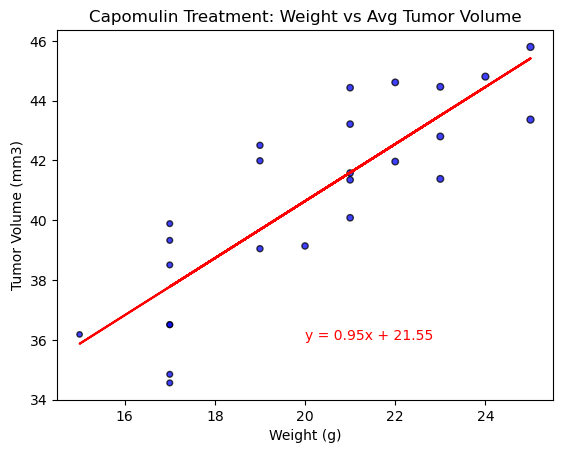

In [285]:
# Calculate the correlation coefficient and linear regression model 
# for average mouse weight and average tumor volume for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin_weight=capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
average_capomulin_volume=capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

x_axis=average_capomulin_weight
y_axis=average_capomulin_volume

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#correlation
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is: {round(correlation[0],2)}") 


#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)

#labels
plt.title("Capomulin Treatment: Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),color='red')

plt.savefig("Images/linearregression.png")
plt.show()